# Level2
## Task1- Table Booking and Online Delivery

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('Dataset.csv')

In [3]:
data

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,Naml۱ Gurme,208,��stanbul,"Kemanke�� Karamustafa Pa��a Mahallesi, R۱ht۱m ...",Karak�_y,"Karak�_y, ��stanbul",28.977392,41.022793,Turkish,...,Turkish Lira(TL),No,No,No,No,3,4.1,Green,Very Good,788
9547,5908749,Ceviz A��ac۱,208,��stanbul,"Ko��uyolu Mahallesi, Muhittin ��st�_nda�� Cadd...",Ko��uyolu,"Ko��uyolu, ��stanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",...,Turkish Lira(TL),No,No,No,No,3,4.2,Green,Very Good,1034
9548,5915807,Huqqa,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.034640,41.055817,"Italian, World Cuisine",...,Turkish Lira(TL),No,No,No,No,4,3.7,Yellow,Good,661
9549,5916112,A���k Kahve,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.036019,41.057979,Restaurant Cafe,...,Turkish Lira(TL),No,No,No,No,4,4.0,Green,Very Good,901


In [5]:
data['Has Table booking'] = data['Has Table booking'].apply(lambda x: 1 if x == 'Yes' else 0)
data['Has Online delivery'] = data['Has Online delivery'].apply(lambda x: 1 if x == 'Yes' else 0)

In [6]:
table_booking_percentage = (data['Has Table booking'].sum() / len(data)) * 100
online_delivery_percentage = (data['Has Online delivery'].sum() / len(data)) * 100

print(f"Percentage of restaurants offering table booking: {table_booking_percentage:.2f}%")
print(f"Percentage of restaurants offering online delivery: {online_delivery_percentage:.2f}%")

Percentage of restaurants offering table booking: 12.12%
Percentage of restaurants offering online delivery: 25.66%


In [8]:
online_delivery_by_price_range = data.groupby('Price range')['Has Online delivery'].value_counts(normalize=True).unstack(fill_value=0) * 100

In [9]:
print("Availability of online delivery by price range:")
print(online_delivery_by_price_range)

Availability of online delivery by price range:
Has Online delivery          0          1
Price range                              
1                    84.225923  15.774077
2                    58.689367  41.310633
3                    70.809659  29.190341
4                    90.955631   9.044369


In [10]:
common_cuisines = data['Cuisines'].str.split(', ', expand=True).stack().value_counts().head(10)
print("Top 10 most common cuisines:")
print(common_cuisines)

Top 10 most common cuisines:
North Indian    3960
Chinese         2735
Fast Food       1986
Mughlai          995
Italian          764
Bakery           745
Continental      736
Cafe             703
Desserts         653
South Indian     636
dtype: int64


In [11]:
restaurants_by_city = data['City'].value_counts().head(10)
print("Top 10 cities with the most restaurants:")
print(restaurants_by_city)

Top 10 cities with the most restaurants:
New Delhi       5473
Gurgaon         1118
Noida           1080
Faridabad        251
Ghaziabad         25
Bhubaneshwar      21
Amritsar          21
Ahmedabad         21
Lucknow           21
Guwahati          21
Name: City, dtype: int64


In [13]:
average_cost_by_city = data.groupby('City')['Average Cost for two'].mean().sort_values(ascending=False).head(10)
print("Top 10 cities with the highest average cost for two people:")
print(average_cost_by_city)

Top 10 cities with the highest average cost for two people:
City
Jakarta             308437.500000
Tangerang           250000.000000
Bogor               160000.000000
Bandung             150000.000000
Pasay City            3333.333333
Colombo               2375.000000
Mandaluyong City      2000.000000
Panchkula             2000.000000
Taguig City           1725.000000
Hyderabad             1361.111111
Name: Average Cost for two, dtype: float64


In [19]:
unique_colors = data['Rating color'].unique()
print(unique_colors)

['Dark Green' 'Green' 'Yellow' 'Orange' 'White' 'Red']


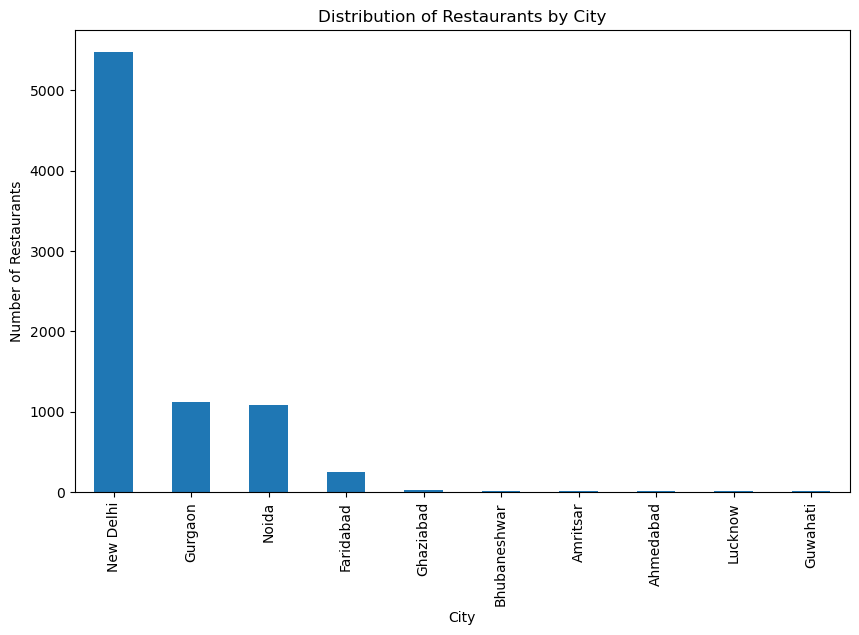

In [20]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
restaurants_by_city.plot(kind='bar')
plt.title('Distribution of Restaurants by City')
plt.xlabel('City')
plt.ylabel('Number of Restaurants')
plt.show()
